In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df['total_bedrooms']=df['total_bedrooms'].astype('float64')
mean=df['total_bedrooms'].mean()
mean

537.8705525375618

In [9]:
df['total_bedrooms']=df['total_bedrooms'].fillna(value=mean)

In [10]:
df['total_bedrooms'].value_counts()

total_bedrooms
537.870553     207
280.000000      55
331.000000      51
345.000000      50
343.000000      49
              ... 
2961.000000      1
1915.000000      1
1215.000000      1
3298.000000      1
1052.000000      1
Name: count, Length: 1924, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
dfenc=pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)

In [15]:
dfenc=dfenc.replace({True: 1, False: 0})

In [16]:
dfenc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [17]:
dfenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

<Axes: >

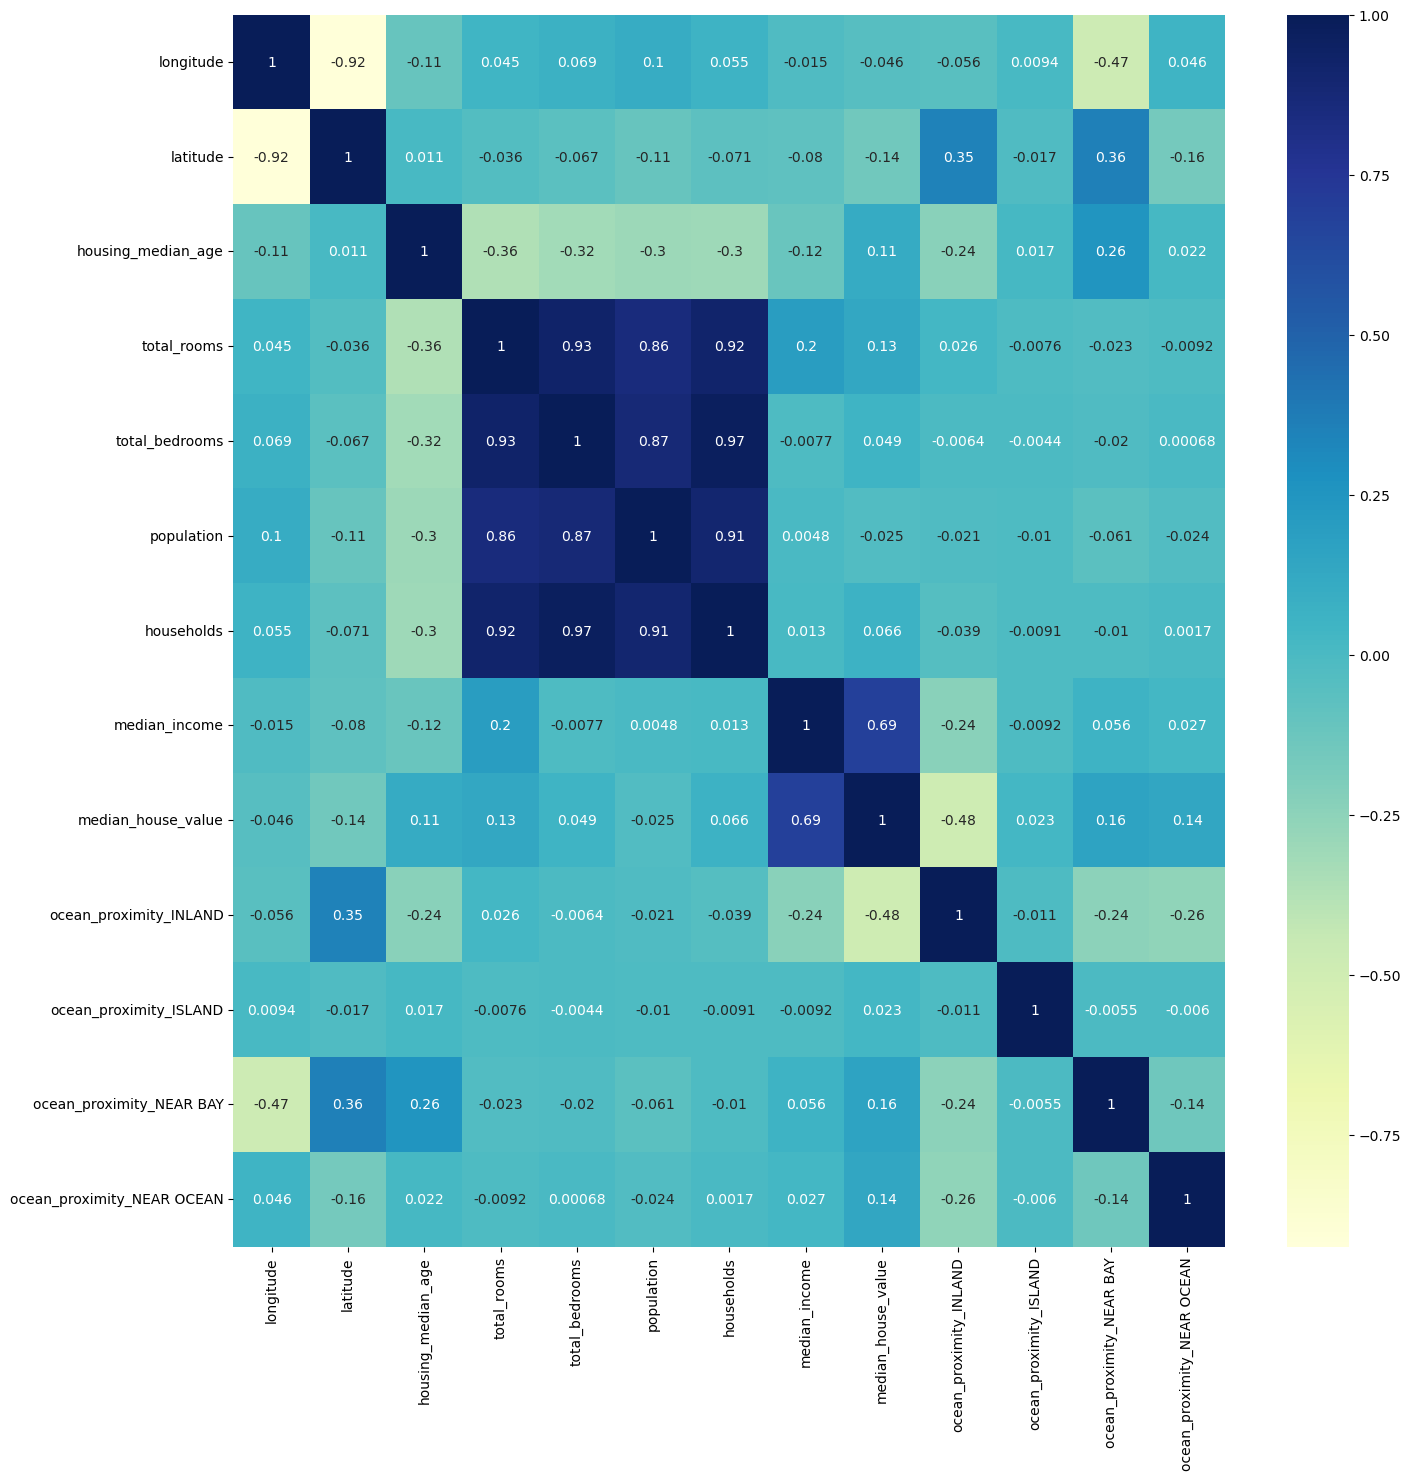

In [18]:
plt.figure(figsize=(16, 16))
co_mtx = dfenc.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

In [19]:
dfenc.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


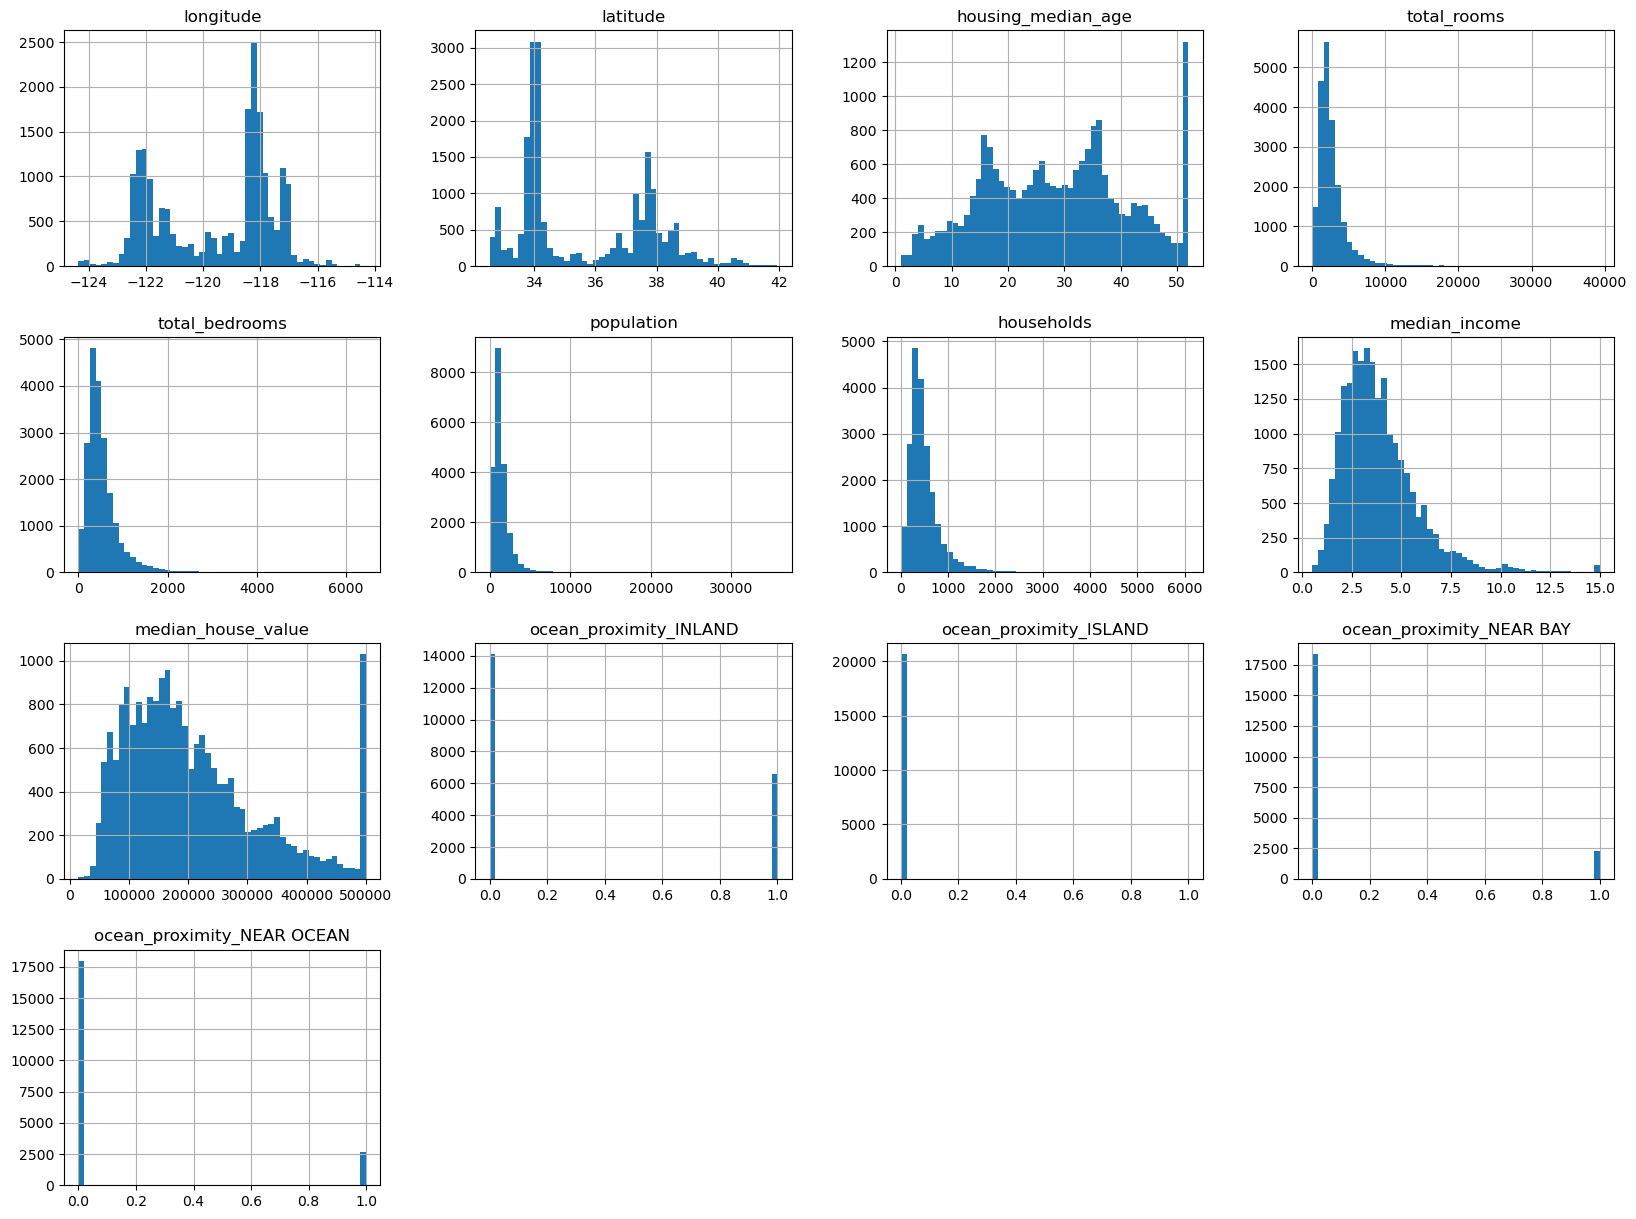

In [20]:
dfenc.hist(bins=50,figsize=(20,15))
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sclr=StandardScaler()

In [23]:
df=sclr.fit_transform(dfenc)

In [24]:
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.015566,2.830742,-0.384466


In [25]:
df.columns=dfenc.columns

In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.015566,2.830742,-0.384466


In [27]:
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from math import sqrt

In [75]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [76]:
lr=lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
mae_lr=mean_absolute_error(y_test,lr_pred)
mse_lr=mean_squared_error(y_test,lr_pred)
rmse_lr=sqrt(mse_lr)
r2_lr=r2_score(y_test,lr_pred)
print('MAE', mae_lr)
print('MSE', mse_lr)
print('RMSE', rmse_lr)
print('R2', r2_lr)

MAE 0.43417039283795744
MSE 0.3552758198425569
RMSE 0.5960501823190367
R2 0.6395785380523744


In [77]:
dt_train=dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
mae_dt=mean_absolute_error(y_test,dt_pred)
mse_dt=mean_squared_error(y_test,dt_pred)
rmse_dt=sqrt(mse_dt)
r2_dt=r2_score(y_test,dt_pred)
print('MAE', mae_dt)
print('MSE', mse_dt)
print('RMSE', rmse_dt)
print('R2', r2_dt)

MAE 0.37961240739865165
MSE 0.3628037685648063
RMSE 0.602331942175414
R2 0.631941558183769


In [78]:
rf_train=rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
mae_rf=mean_absolute_error(y_test,rf_pred)
mse_rf=mean_squared_error(y_test,rf_pred)
rmse_rf=sqrt(mse_rf)
r2_rf=r2_score(y_test,rf_pred)
print('MAE', mae_rf)
print('MSE', mse_rf)
print('RMSE', rmse_rf)
print('R2', r2_rf)

MAE 0.27487982145463574
MSE 0.177539969542074
RMSE 0.4213549211081722
R2 0.8198886279261883


In [53]:
from sklearn.model_selection import KFold , cross_val_score 

In [88]:
n=15
kf=KFold(n_splits=n , shuffle=True , random_state=42)

In [89]:
cvscore_lr=cross_val_score(lr, x , y , cv=kf)
cvscore_lr

array([0.62538316, 0.60938687, 0.64048626, 0.67983791, 0.64751661,
       0.62543406, 0.63765607, 0.6779099 , 0.63037953, 0.70141658,
       0.63519415, 0.68205314, 0.61546753, 0.58639084, 0.64621075])

In [90]:
cvscore_dt=cross_val_score(dt, x , y , cv=kf)
cvscore_dt

array([0.64315963, 0.66025051, 0.6670592 , 0.67470349, 0.67215713,
       0.6344713 , 0.66155019, 0.66145421, 0.61418935, 0.70986625,
       0.63047047, 0.70733919, 0.62430401, 0.68704593, 0.66906282])

In [91]:
cvscore_rf=cross_val_score(rf, x , y , cv=kf)
cvscore_rf

array([0.82051911, 0.81007773, 0.83061247, 0.84162682, 0.83750137,
       0.80899035, 0.83344484, 0.82862831, 0.80792666, 0.85137499,
       0.82349611, 0.8593296 , 0.78619265, 0.8325685 , 0.8259297 ])